<a href="https://colab.research.google.com/github/katie-060330/2.1/blob/gh-pages/A1_WineQT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Katie Lonsway<br/>
Student Number: 300315147

# Exploratory Analysis

## Import important libraries

In [22]:
#note some of these libraries where used to tryout differnt ways of solving the  problem,
#not all of htem may be used but i would rather have extra rather delete something imporant
#by acciedent
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [ ]:
#data set one not a valid choice to investigate bacue it has 214 data sets
glass_url = "https://raw.githubusercontent.com/katie-060330/AIA1/main/glass.csv"

dataset1 = pd.read_csv(glass_url)


In [ ]:
#dataset number two
dermatology_url = "https://raw.githubusercontent.com/katie-060330/AIA1/main/dermatology_database_1.csv"

dataset2 = pd.read_csv(dermatology_url)


In [ ]:
#data set 3, good for urture selection
maternal_url ="https://raw.githubusercontent.com/katie-060330/AIA1/main/Maternal%20Health%20Risk%20Data%20Set.csv"
dataset3 = pd.read_csv(maternal_url)



In [ ]:
#data set 4
car_data = "https://raw.githubusercontent.com/katie-060330/AIA1/main/car.data"
dataset4 = pd.read_csv(car_data)

dataset4.rename(columns={'vhigh': 'buying', 'vhigh.1': 'maint', '2' :'# of doors', '2.1': 'capacity', 'small' : "luggage", 'low':'safety', 'unacc' : "class"}, inplace=True)


#cite to rename collums https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

In [4]:
#dataset 5
wineQT_url = "https://raw.githubusercontent.com/katie-060330/AIA1/main/WineQT.csv"
dataset5 = pd.read_csv(wineQT_url)



In [ ]:
#dataset 6
p_url = "https://raw.githubusercontent.com/katie-060330/AIA1/refs/heads/main/16P.csv"

dataset6 = pd.read_csv(p_url, encoding='latin1')



In [ ]:
#dataset 7
credit_url = "https://raw.githubusercontent.com/katie-060330/AIA1/main/test.csv"
credit_test_url = "https://raw.githubusercontent.com/katie-060330/AIA1/main/test.csv"
train = pd.read_csv(credit_url)
test = pd.read_csv(credit_test_url)
dataset7 = pd.concat([test, train])



## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.3 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

#1.1
- missing values using the array of possible missing values ["NA", "", "?", None, np.NaN]
    
      

In [ ]:
# missign values
#https://www.youtube.com/watch?v=AbBZYHNYFaY

def isMissing(dataset):
  missing_vals = ["NA", "?", None, np.NaN]
  missing = dataset.isin(missing_vals)
  return  ("has " +str(missing.sum().sum())+ " errors")




In [ ]:
#finding the ammoutn of erros in each dataset

print("dataset1 "+ isMissing(dataset1))
print("dataset2 "+ isMissing(dataset2))
print("dataset3 "+ isMissing(dataset3))
print("dataset4 "+ isMissing(dataset4))
print("dataset5 "+ isMissing(dataset5))
print("dataset6 "+ isMissing(dataset6))
print("dataset7 "+ isMissing(dataset7))



dataset1 has 0 errors
dataset2 has 8 errors
dataset3 has 0 errors
dataset4 has 0 errors
dataset5 has 0 errors
dataset6 has 0 errors
dataset7 has 60106 errors


#1.2
- using the function isMissing we can see what datasets have errors in them and where we need to investigate. using the sum() function once calualtes when a value collum in the missing_val appears in the given dataset and the second sum() add the rows together creating how many errors we have in each dataset.

#1.3
- from here we need to imputate both dataset 2 and 7 as they have errors

In [ ]:
#uppon inspection the data that is missing is from the same collum age as
#it is only 8 rows that have errors and to guess the age would impact the integrity of the data we can just remove the 8 rows as a whole
dataset2Cleaned = dataset2[dataset2['age'] != '?']
print("dataset2 now "+ isMissing(dataset2Cleaned))

dataset2 now has 0 errors


In [ ]:
#becasue dataset 7 has so many errors we can not go with the saem approcah
missing_vals = ["NA", "?", None]
prepdata = dataset7.replace(missing_vals, np.NaN)

#we replace all of the place holders in missing values wuth np.NaN
# we fill all the NaN values with the mode or mean depending on if its an object or not


for column in prepdata.columns:
    if prepdata[column].dtype == 'object':
        prepdata[column].fillna(prepdata[column].mode()[0], inplace=True)
cleaned_dataset = prepdata.fillna(prepdata.mean(numeric_only=True))
isMissing(cleaned_dataset)

#https://stackoverflow.com/questions/17173524/pandas-dataframe-object-types-fillna-exception-over-different-datatypes#:~:text=6%20Answers.%20Sorted%20by:%2015.%20You%20can%20iterate%20through%20them


'has 0 errors'

2. **Select and familiarize yourself with a classification task:** Choose one of the provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?


- 2
  - Im chosing the wine set to detrinmine the quallity of the wine based on the alcohoul percentange the residual sugar. ichose these quallites based on the following reaserch.
- 2.1
 - The task is to be able to determine the quality of the wine based on the following feilds
   - fixed acitity
     - higher fixed acitity pared wiht lower density make a better quallity wine
     - https://blog.minitab.com/en/using-statistical-regression-to-model-the-taste-of-wine#:~:text=Higher%20fixed%20acidity%20and%20a%20lower,density%20tend%20to%20improve%20wine%20quality.
   - residual sugar
     - residual sugar imacts the taste texture and the balance of wine
     - https://cullerwines.com/what-is-residual-sugar-in-wine/#:~:text=Key%20Takeaways%201%20Residual%20sugar%20impacts%20the%20taste%2C,wine%20styles%20have%20varying%20levels%20of%20residual%20sugar.
   - density
     - wine desnity is detrmined by its sugal alcohoul. 10 density wouls be the same as water. desnity impacts the structure of wine and affects how strong the flavors and aromas are.
     - https://allwinesofeurope.com/a-guide-to-understanding-wine-density-and-concentration/#:~:text=The%20density%20of%20wine%20can%20have%20a%20significant,aromas%20due%20to%20the%20higher%20concentration%20of%20solutes.
   - pH
     - pH measures the acidity of the wine and determines its ripeness. low ph would be more acidic meaning it typically tastes sour rather high Ph would be lack freshness due to increased bactiral growth.
     - it can also affect the taste aroma and stabillity
     - https://atlas-scientific.com/blog/the-importance-of-ph-in-wine-making/#:~:text=The%20Effects%20Of%20pH%20On%20Wine%20Quality%201,maintaining%20its%20shelf%20life.%20...%204%20Fermentation%20
   - sulphates
     - kill the bactrias in wine to help it last longer and have that vintage taste to the wine, sufites also stop browing by reacting with the oxygen once the wine is opened.
     - https://www.dryfarmwines.com/blogs/a-matter-of-taste/sulfites-in-wine#:~:text=Sulfites%20kill%20bacteria%20that%20make%20wine%20go%20bad.,wine%20wouldn%E2%80%99t%20last%20much%20longer%20than%20six%20months.
   -  alcohoul percentage
     - alcoul percetnge can affect the falvor and the texture of the wine, the evaprating alcohoul creates the aroma of the winealcoul aslo add vscosity and helps balance the sweetenss and the acidity of the wine
     - https://www.tennessean.com/story/life/food/2015/04/17/alcohol-content-affect-wine/25779589/#:~:text=Alcohol%20content%20affects%20both%20flavor%20and%20texture%2C%20and,make%20a%20wine%20seem%20%E2%80%9Chot%E2%80%9D%20on%20the%20palate.
  - other categories uppon reaserching didnt have that much information on why these factors affect the quality of wine and the values of the missing data had minimal ranges in decimals so i have left them out.


3. **Attribute Analysis**:

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

#3
- 3.1
 - based on the inforamtion above, i need to remove the following collums from the data Voliataile acitity, citric acid, free sulfur dioxide, total sulfur dioxide, and id

In [ ]:
#removing the colums identified above

dataset5.drop(dataset5.columns[[1,2,4,5,6,12]], axis=1, inplace=True)
dataset5


#cite to remove colums from panada
#https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

,fixed acidity,residual sugar,density,pH,sulphates,alcohol,quality
0,7.4,1.9,0.99780,3.51,0.56,9.4,5
1,7.8,2.6,0.99680,3.20,0.68,9.8,5
2,7.8,2.3,0.99700,3.26,0.65,9.8,5
3,11.2,1.9,0.99800,3.16,0.58,9.8,6
4,7.4,1.9,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...
1138,6.3,2.3,0.99574,3.42,0.75,11.0,6
1139,6.8,1.9,0.99651,3.42,0.82,9.5,6
1140,6.2,2.0,0.99490,3.45,0.58,10.5,5
1141,5.9,2.2,0.99512,3.52,0.76,11.2,6


- 3.2
  - we can see that most of the outliers are above the average
  - we can obtain the range from the min value and the max value and calulating that based on those values
  - quality is very consisitant with its values with a range form 3-8
  - we are able to abtain the meadian

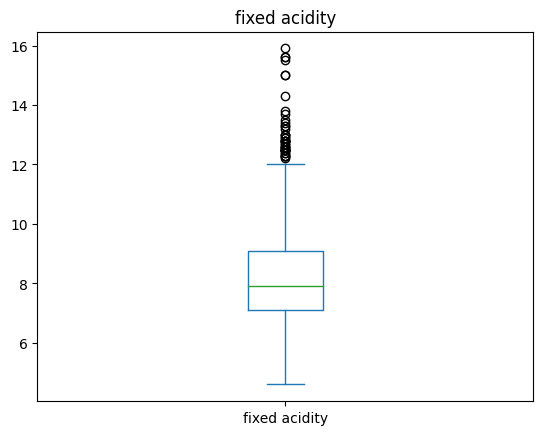

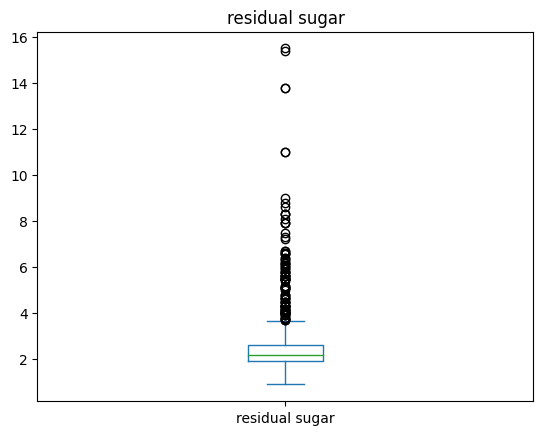

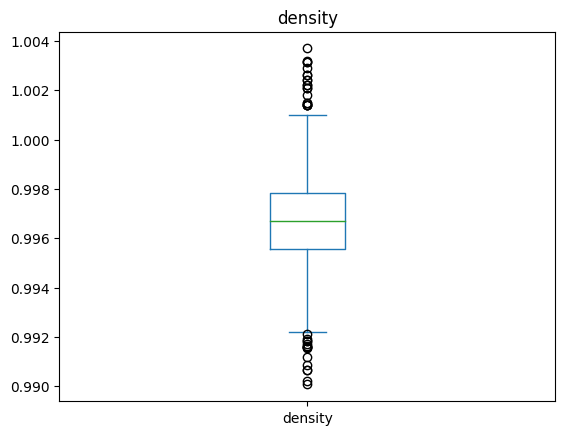

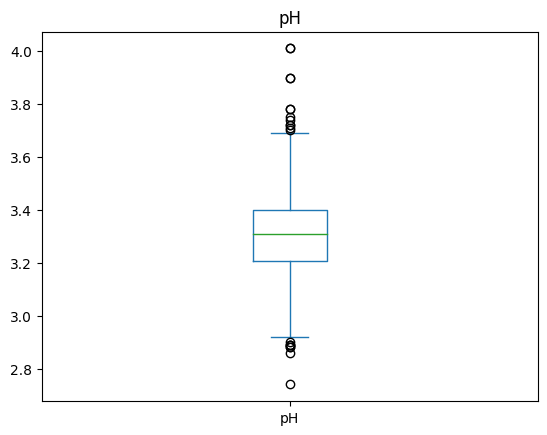

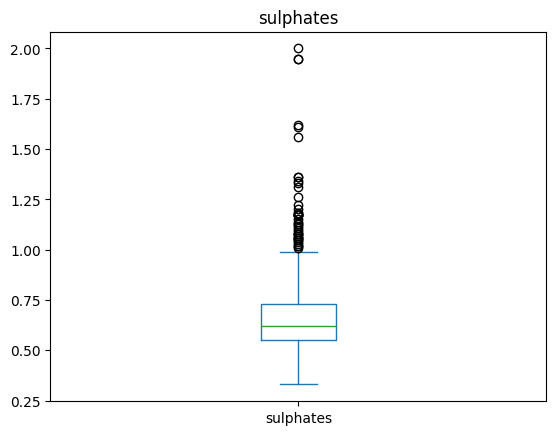

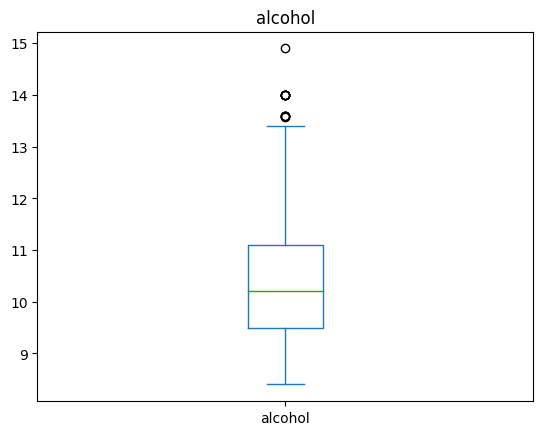

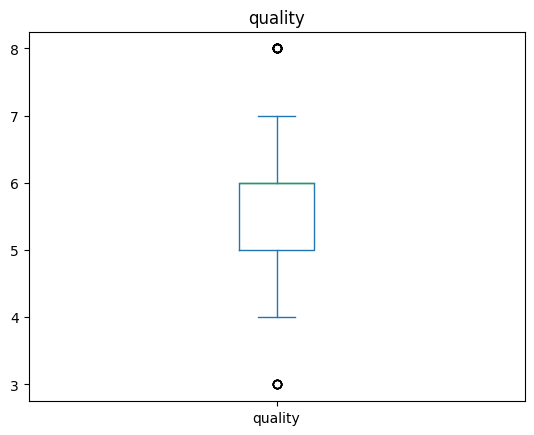

In [ ]:
xcols = ['fixed acidity', 'residual sugar','density', 'pH', 'sulphates', 'alcohol', "quality" ]
for col in xcols:
  # sns.displot(dataset5, x=col)
  dataset5[col].plot(kind='box', title=col)
  plt.show()


# https://www.geeksforgeeks.org/how-to-create-boxplot-from-pandas-dataframe/

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

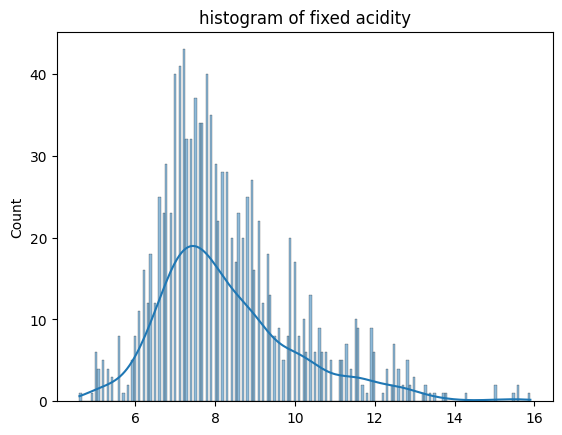

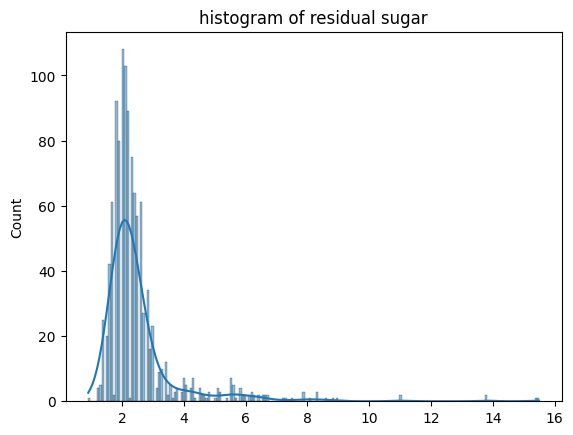

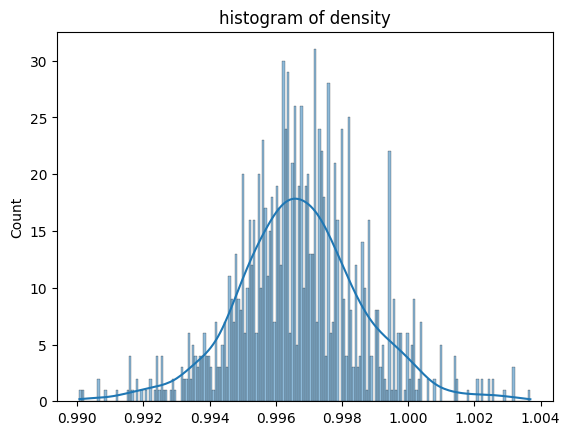

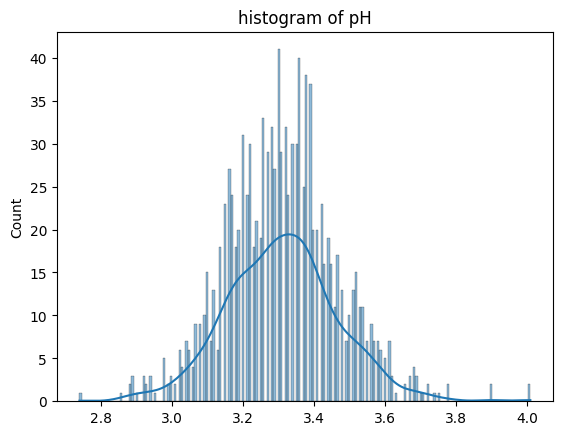

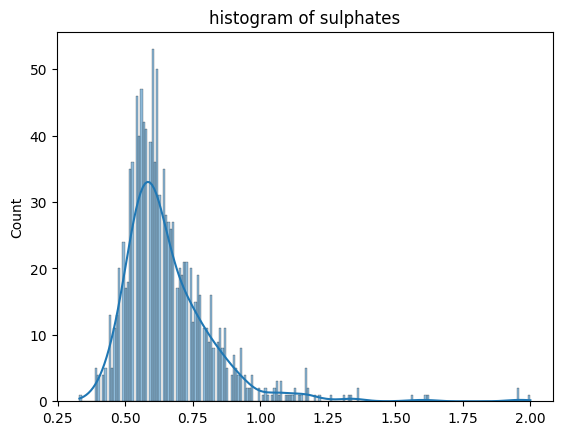

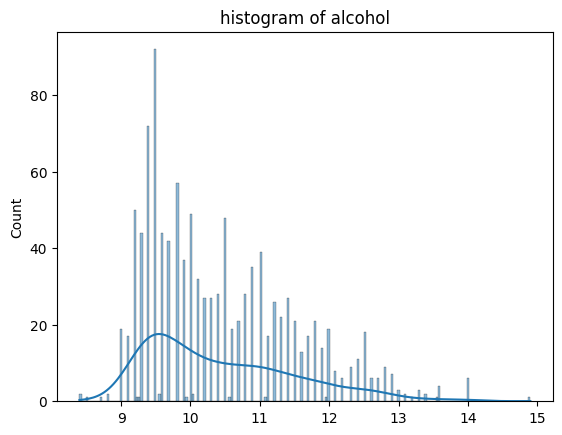

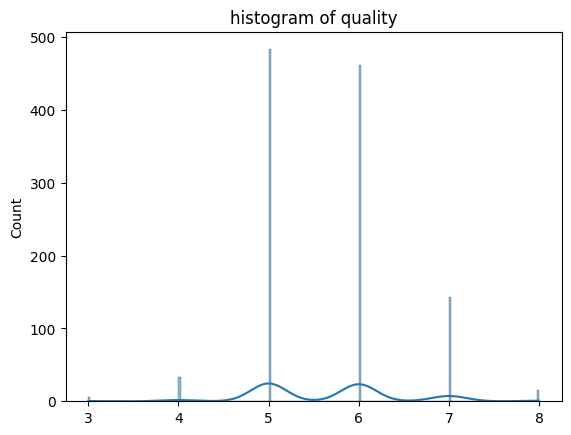

In [ ]:
xcols = ['fixed acidity', 'residual sugar','density', 'pH', 'sulphates', 'alcohol', "quality" ]
for col in xcols:
  data = dataset5[col].values
  plott = sns.histplot(data=data, bins=200, kde=True)
  plott.set(title=f'histogram of {col}')
  plt.show()

#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

- 4
  - investigation of data
    - residual sugar is pretty well balanced with small ammount of data having values from 4-8
    - desity and pH is well balanced
    - sulphates is in a similar case to residual sugars with smaller values  1-1.3
    - alcohoul and quality has values that are ore common and have less decimals making the frequency of the numbers to occur higher rather than the decimal heavy groups

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [15]:
#target class is quality divided into 3,4,5,6,7,8 classes
y = dataset5["quality"]
X = dataset5.drop(columns=['quality'])

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



5. **Preprocessing**:

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

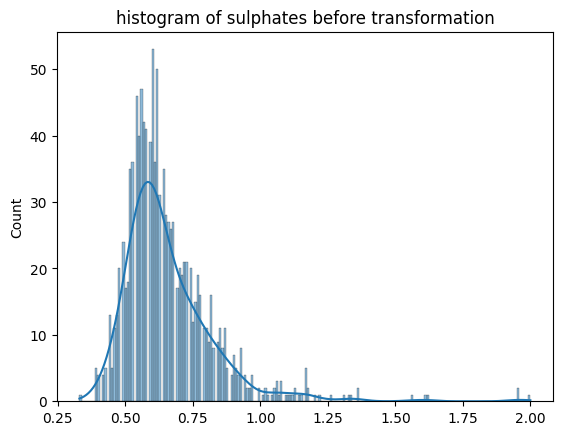

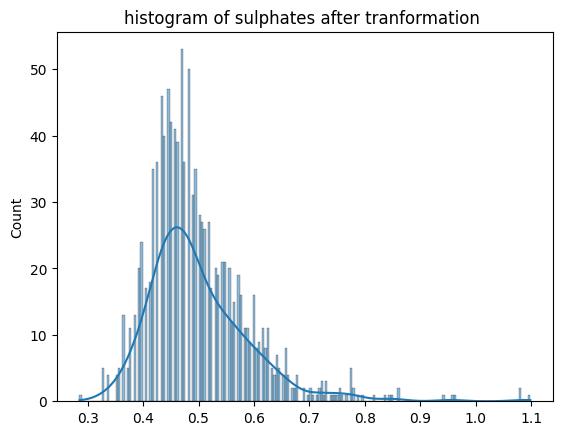

In [ ]:
#you are supposed to sepeates the data and then pre preoccess (as weve seen in class we shouldnt pre procces the data set )
#from the histograms we can see that sulphaste are negitvaly skewed and from my reaerch for negativly skewed dataset we use
df = dataset5


data = dataset5['sulphates'].values
plott = sns.histplot(data=data, bins=200, kde=True)
plott.set(title=f'histogram of sulphates before transformation')
plt.show()

df_transformed =  np.log1p(df['sulphates'])


data = df_transformed.values
plott = sns.histplot(data=data, bins=200, kde=True)
plott.set(title=f'histogram of sulphates after tranformation ')
plt.show()

#as you can see the transofrmation has spread out the data and centerd it a tad


#https://www.slingacademy.com/article/understanding-dataframe-transform-method-in-pandas-5-examples/#:~:text=The%20transform()%20method%20in%20Pandas%20is%20a%20powerful%20tool%20for

In [10]:
#onehot encoding
# i do not have a categorical data so i will use the "quality" to be the target value and convert it to 1s and zeros


encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(dataset5[['quality']])

q_encoded = encoder.transform(dataset5[['quality']]).toarray()
combined = pd.DataFrame(q_encoded, columns=encoder.get_feature_names_out(['quality']))

print(combined)
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8
0           0.0        0.0        1.0        0.0        0.0        0.0
1           0.0        0.0        1.0        0.0        0.0        0.0
2           0.0        0.0        1.0        0.0        0.0        0.0
3           0.0        0.0        0.0        1.0        0.0        0.0
4           0.0        0.0        1.0        0.0        0.0        0.0
...         ...        ...        ...        ...        ...        ...
1138        0.0        0.0        0.0        1.0        0.0        0.0
1139        0.0        0.0        0.0        1.0        0.0        0.0
1140        0.0        0.0        1.0        0.0        0.0        0.0
1141        0.0        0.0        0.0        1.0        0.0        0.0
1142        0.0        0.0        1.0        0.0        0.0        0.0

[1143 rows x 6 columns]


--------------------------------------------------------------------------

# References

All refrences have been placed in the same code cell where i got the information

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".